In [2]:
import torch
import torch.nn as nn
import torch.nn.functional as F

import numpy as np
import matplotlib.pyplot as plt

In [19]:
widths = [30, 50, 100, 150, 200, 250]
colors = {30: 'r', 50: 'g', 100: 'b', 150: 'c', 200: 'm', 250: 'y'}

l1_weights = [0., 1e-6, 1e-5]
linestyles = {0.: '-', 1e-6: '--', 1e-5: '-.'}

In [13]:
import os 

for filename in os.listdir('width'):
    if "_l1_" not in filename and filename.endswith(".pth"):
        print(filename)

        parts = filename.split('_')
        filename_parts_new = parts[:2] + ["0.0_l1"] + parts[2:]
        filename_new = "_".join(filename_parts_new)
        
        print(filename_new)
        # now rename the file
        os.rename(os.path.join('width', filename), os.path.join('width', filename_new))
        

net6x50_width_best_state.pth
net6x50_width_0.0_l1_best_state.pth
net6x30_width_best_state.pth
net6x30_width_0.0_l1_best_state.pth
net6x30_width_val_losses.pth
net6x30_width_0.0_l1_val_losses.pth
net6x200_width_val_losses.pth
net6x200_width_0.0_l1_val_losses.pth
net6x150_width_train_maes.pth
net6x150_width_0.0_l1_train_maes.pth
net6x150_width_train_losses.pth
net6x150_width_0.0_l1_train_losses.pth
net6x100_width_train_maes.pth
net6x100_width_0.0_l1_train_maes.pth
net6x250_width_train_losses.pth
net6x250_width_0.0_l1_train_losses.pth
net6x200_width_train_maes.pth
net6x200_width_0.0_l1_train_maes.pth
net6x250_width_val_losses.pth
net6x250_width_0.0_l1_val_losses.pth
net6x50_width_val_maxs.pth
net6x50_width_0.0_l1_val_maxs.pth
net6x150_width_val_maxs.pth
net6x150_width_0.0_l1_val_maxs.pth
net6x50_width_val_maes.pth
net6x50_width_0.0_l1_val_maes.pth
net6x30_width_train_maes.pth
net6x30_width_0.0_l1_train_maes.pth
net6x100_width_val_maes.pth
net6x100_width_0.0_l1_val_maes.pth
net6x200_width_

# Maximum Error on Validation Set

The maximum absolute error $|\hat{y} - y|$ over the validation set was measured for each epoch.

- there is a large gap in capacity between a width of $50$ and $100$.
- the gap between the larger networks is quite small
- I am not sure about convergence for the larger networks

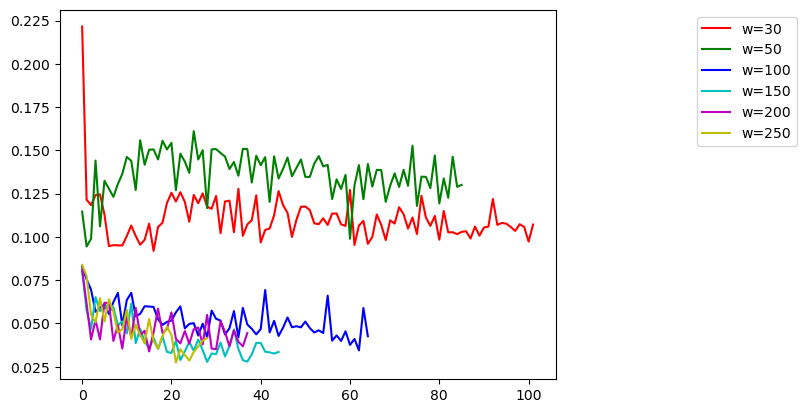

In [14]:
for w in widths:
    netname = f"net6x{w}_width_0.0_l1"
    val_maxs = torch.load(f'./width/{netname}_val_maxs.pth')
    
    plt.plot(val_maxs, label=f"w={w}", color=colors[w])

plt.legend(loc='upper right', bbox_to_anchor=(1.5, 1))
plt.show()

In terms of minimum max error achieved, the networks that are larger than $100$ in width seem to be very similar.

When we look at the average max error over all training epochs, the larger networks seem to get worse, but this might just be an effect of fewer epochs due to longer training time (the worse epochs at the start have more weight).

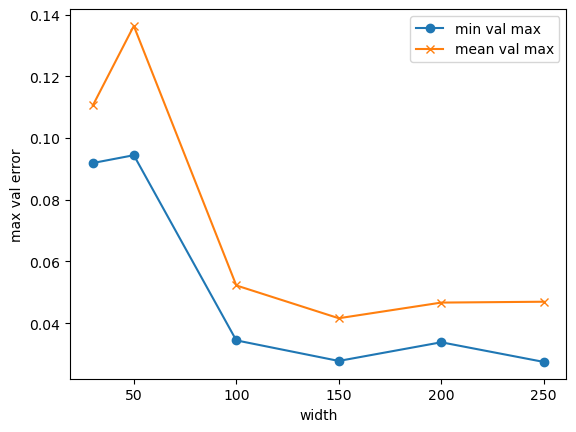

In [16]:
val_maxs = []
val_avgs = []
for w in widths:
    netname = f"net6x{w}_width_0.0_l1"
    val_maxs.append(np.min(torch.load(f'./width/{netname}_val_maxs.pth')))
    val_avgs.append(np.mean(torch.load(f'./width/{netname}_val_maxs.pth')))

plt.plot(widths, val_maxs, marker='o', label="min val max")
plt.plot(widths, val_avgs, marker='x', label="mean val max")
plt.legend()
plt.xlabel('width')
plt.ylabel('max val error')
plt.show()

# Training and Validation Loss

We used mean squared error to train and evaluate the networks.

- it seems like the error for none of the networks truly converged during the 2h timeout (although the effect is stronger for the larger networks)
- no overfitting can be seen.

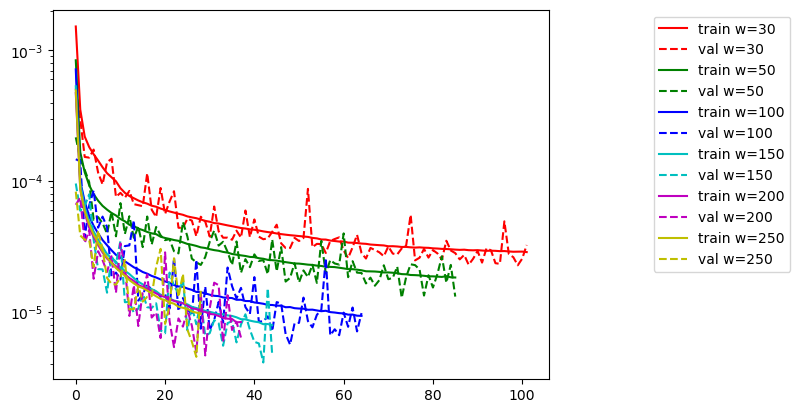

In [17]:
for w in widths:
    netname = f"net6x{w}_width_0.0_l1"
    train_losses = torch.load(f'./width/{netname}_train_losses.pth')
    val_losses = torch.load(f'./width/{netname}_val_losses.pth')

    plt.plot(train_losses, label=f"train w={w}", color=colors[w])
    plt.plot(val_losses, label=f"val w={w}", color=colors[w], linestyle='dashed')

plt.legend(loc='upper right', bbox_to_anchor=(1.5, 1))
plt.yscale('log')
plt.show()

# Interaction between Training Loss and Maximum Error

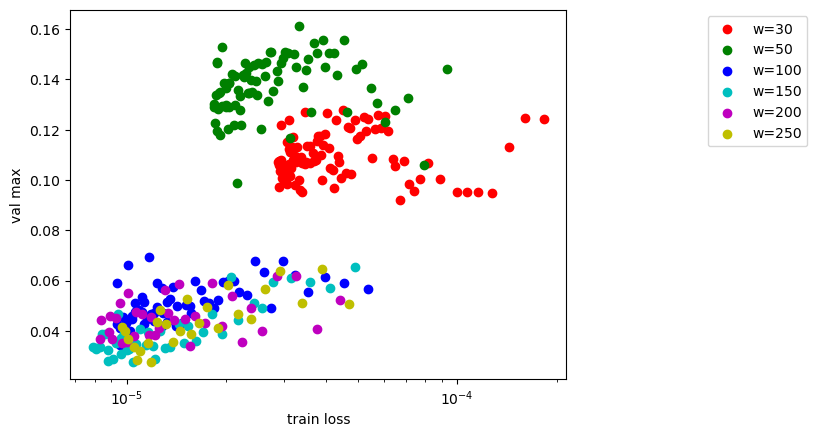

In [18]:
for w in widths:
    netname = f"net6x{w}_width_0.0_l1"
    train_losses = torch.load(f'./width/{netname}_train_losses.pth')
    val_maxs = torch.load(f'./width/{netname}_val_maxs.pth')

    plt.scatter(train_losses[3:], val_maxs[3:], label=f"w={w}", color=colors[w])

plt.legend(loc='upper right', bbox_to_anchor=(1.5, 1))
plt.xlabel('train loss')
plt.ylabel('val max')
plt.xscale('log')
plt.show()

# Effects of L1 Regularization

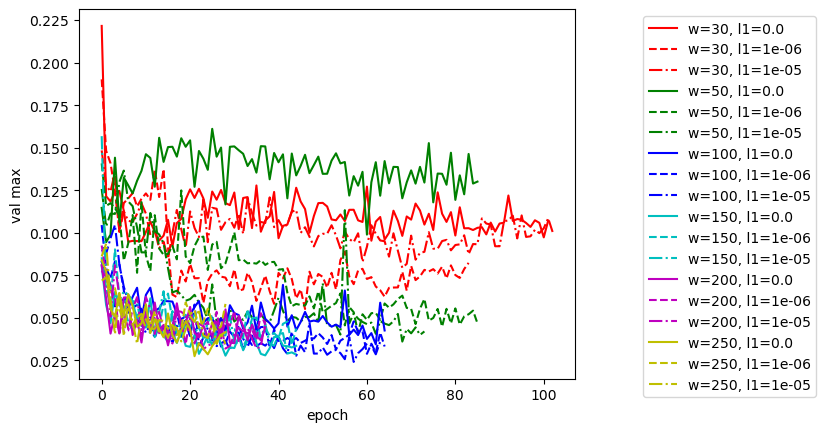

In [22]:
for w in widths:
    for l1 in l1_weights:
        netname = f"net6x{w}_width_{l1}_l1"
        val_maxs = torch.load(f'./width/{netname}_val_maxs.pth')

        plt.plot(val_maxs, label=f"w={w}, l1={l1}", color=colors[w], linestyle=linestyles[l1])

plt.legend(loc='upper right', bbox_to_anchor=(1.5, 1))
plt.xlabel('epoch')
plt.ylabel('val max')
plt.show()

As it seems, $L_1$ regularization greatly benefits the smaller models.

While the error plots for the different values of the $L_1$ regularizer weight are very close for a width $\geq 100$, the lines differ significantly for the smaller networks.

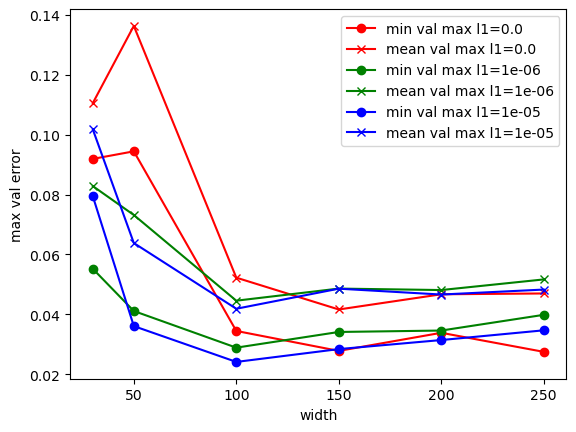

In [23]:
val_maxs = {}
val_avgs = {}
for l1 in l1_weights:
    val_maxs[l1] = []
    val_avgs[l1] = []
    for w in widths:
        netname = f"net6x{w}_width_{l1}_l1"
        val_maxs[l1].append(np.min(torch.load(f'./width/{netname}_val_maxs.pth')))
        val_avgs[l1].append(np.mean(torch.load(f'./width/{netname}_val_maxs.pth')))


l1_color = {0.: 'r', 1e-6: 'g', 1e-5: 'b'}
for l1 in l1_weights:
    plt.plot(widths, val_maxs[l1], marker='o', label=f"min val max l1={l1}", color=l1_color[l1])
    plt.plot(widths, val_avgs[l1], marker='x', label=f"mean val max l1={l1}", color=l1_color[l1])

plt.legend()
plt.xlabel('width')
plt.ylabel('max val error')
plt.show()